# CSV to `GeoDataFrame`

## CSV to `geopandas.GeoDataFrame`

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

# State path to PROJ_LIB to fix ERROR 1: PROJ: proj_create_from_database
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [2]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

In [3]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


<Axes: >

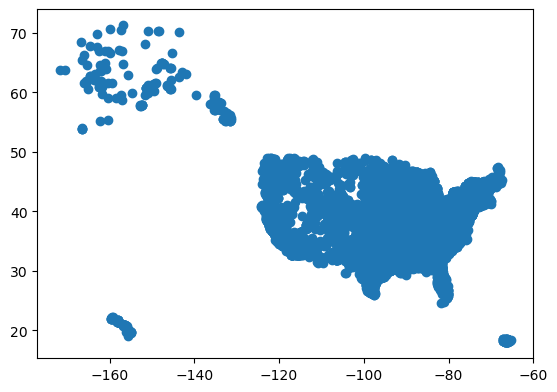

In [4]:
power_plants.plot()

## f-strings

So far, we have printed ariables using string concatenation inside the `print()` function: we use commas to separate every variable and string that we want to print. Example:

In [5]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popuplar way to mix variables and strings in a print statement is by creating a **f-string**, stands for "formatted string". 

The simplest syntax:
```python
f"some text {replace}"
```
where `replace` can be a variable, na expression, a function or method call. 
Example:

In [6]:
# Check what is the ellipsoid
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [7]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formatting output. 

In [8]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


## Import shapefile 

In [9]:
os.getcwd()

'/Users/c_galazgarcia/MEDS/EDS-220/eds220-2024-in-class-LIVE'

In [10]:
# Create absolute file path to data
fp = os.path.join('/', 
                  'courses', 
                  'EDS220', 
                  'data',
                  'tl_2022_us_state',
                  'tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<Axes: >

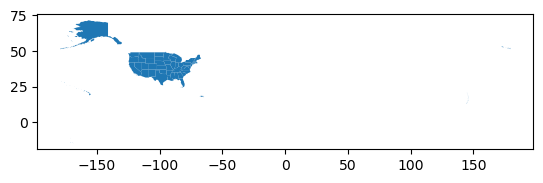

In [11]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe: 
`region`, `division`, `statefp`

First thing, check if these are columns with strings:

In [12]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This inconvenient because it repeats the smae piece of code, only changing the column name. 
Instead, using a `for` loop allows to succintly print the same info:

In [13]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names. 

**DRY code**

DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic. 
If you need to repeat the "same" code more than twice, you probably need a `for` loop. 

Next, update data type of the code columns to be integers. 
This time, we verify the data type of the column using the `is_numeric_dtype()` and `assert` statement:

In [14]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])  # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`. 
If the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code from running. 
Example:

In [15]:
# Does nothing if statement is True
assert 2 + 2 == 4

In [16]:
# Raises an error if statement is False
#assert 2 + 2 == 3

## Data selection 

For this lesson, we want to use only the contiguous states. The `states` geo-dataframe covers a bigger extension.

<Axes: >

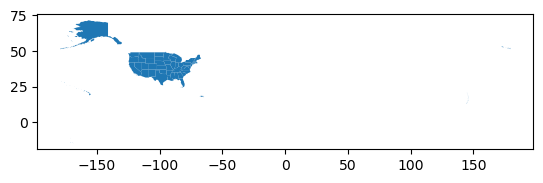

In [17]:
states.plot()

## Check-in

- What are the unique values for region, division, and state codes in the data?
- Which codes should we select to keep only states in the contiguous US?

In [18]:
states.region.unique()

array([3, 2, 1, 4, 9])

Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded. 

In [19]:
# Select contiguous US states
contiguous = states[ (states.region!=9) & (~states.statefp.isin([2,15]))]

<Axes: >

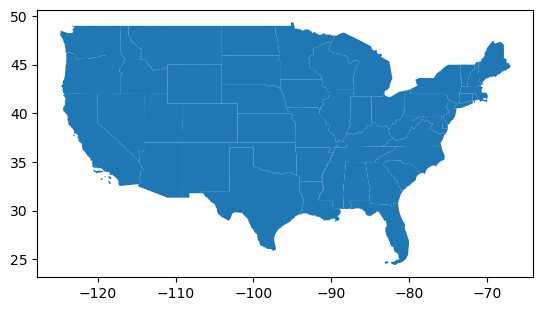

In [20]:
contiguous.plot()

The `~` tilde symbol is used in Ptyhon to negate a statement.

Select the data in the `power_plants` data frame for the contiguous US states. 

In [21]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting

Before we plot our data, let's make sure they are in the same CRS:

In [22]:
contiguous.crs == power_plants.crs

False

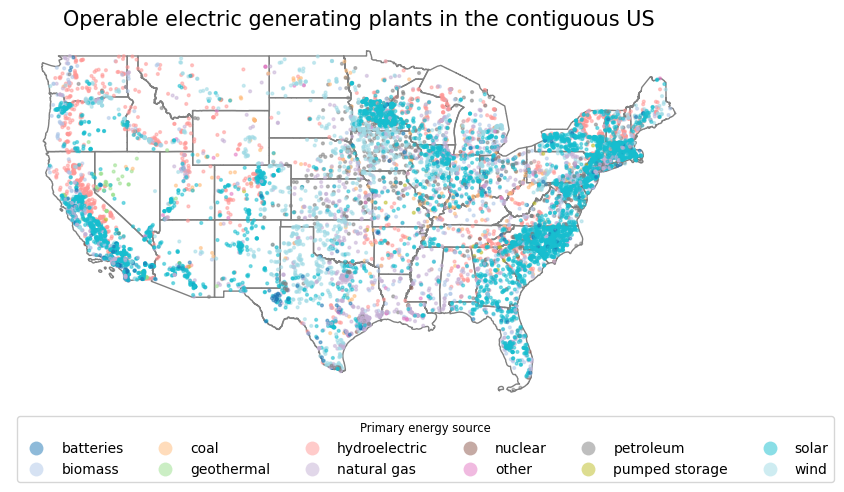

In [23]:
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Operable electric generating plants in the contiguous US', fontsize=15)

contiguous.plot(ax=ax, 
                color='none',
                edgecolor='gray')

# Add electric power plants colored by energy source

power_plants.plot(ax=ax,
                  column='primsource',  # Color by values in this column
                  legend=True,
                  markersize=4, 
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title':'Primary energy source',
                      'title_fontsize':'small',
                      'ncol':6,
                      'loc':'upper left',
                      'bbox_to_anchor':(0,0)
                  }
                 )

plt.show()

We controlled the egend location using `loc` and `bbox_to_anchor` in the `legend_kwds`:

- `loc` indicates **the corner of the legend that we want to use for placement**,
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are *inside* the axes. 

## `for` with `zip`

Often, we need to iterate simultanously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. 

When used in a `for` lopp it allows you to process elements of each list together.

Example:

In [24]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

1
2
3


In [26]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`. 
A common situation when code gets repeated is when creating subplots. 

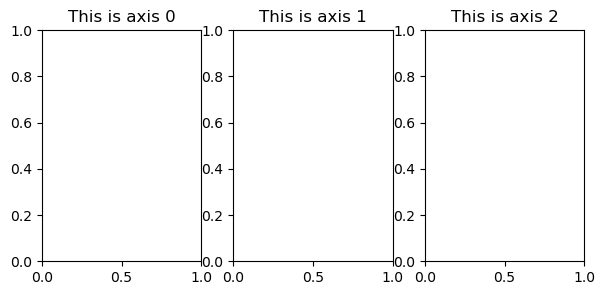

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

In [29]:
axes

array([<Axes: title={'center': 'This is axis 0'}>,
       <Axes: title={'center': 'This is axis 1'}>,
       <Axes: title={'center': 'This is axis 2'}>], dtype=object)

## Check-in 

Use `for` and `zip` to create the same subplots and avoid redundancy. 

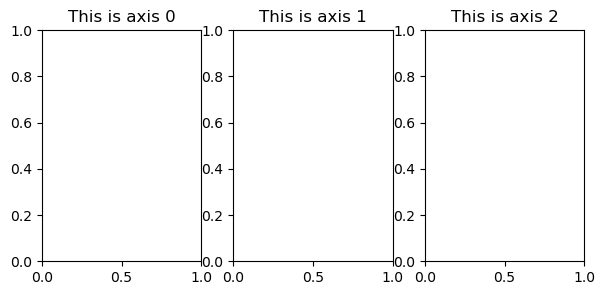

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")

plt.show()

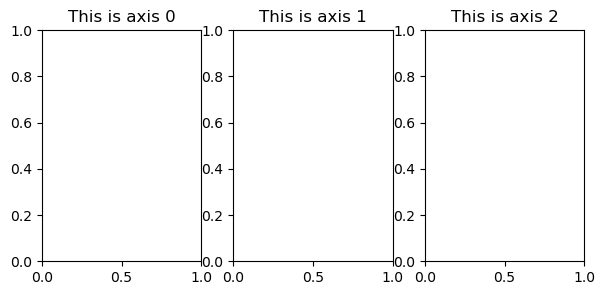

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for i in [0,1,2]:
    axes[i].set_title(f"This is axis {i}")

plt.show()

Remember we have been working with two datasets:

In [35]:
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)


<Axes: >

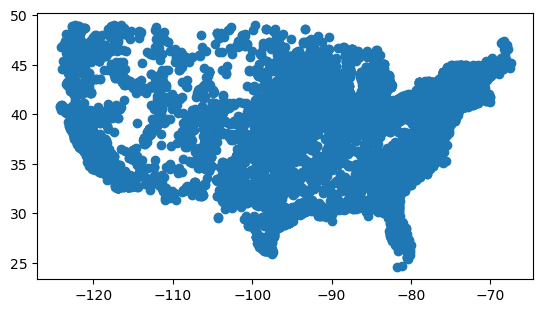

In [38]:
power_plants.plot()

In [36]:
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

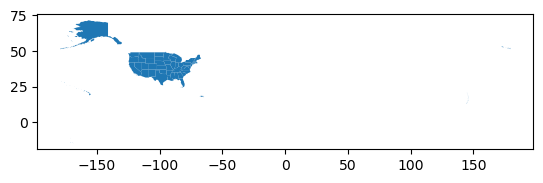

In [37]:
states.plot()

## Exercise

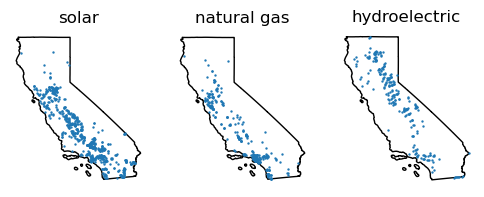

In [53]:
ca_power_plants = power_plants[power_plants.state=='California']
top_sources = ca_power_plants.primsource.value_counts().index[:3].tolist()

ca_boundary = states[states.name=='California']

# Create plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6,3))

for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax=ax,
                     color='none')
    
    # Select points for the sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax=ax, 
                markersize=0.5)
    ax.set_title(source)
    ax.axis('off')
    
plt.show()

## Functions

**functions** in Python are blocks of reusable code designed to perform specific tasks, and make your code more modular and organized. 

The general syntax:

```python
def function_name(parameter_1, ..., paremeter_n ):
    """Docstring"""
    <body of the function>
    return value  # Depends on the function
```

Examples:
A simple function with a one-line docstring and no return values.

In [54]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

In [55]:
greet()

Hello, welcome to the class!


Example 2:
a function with a more detailed docsring and a return value

In [56]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius. 
    
    Args:
        radius (float): The radius of the circle
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    # Check for the data type and only go into the function if dtype is float
    area = 3.14159 * radius ** 2
    return area

In [58]:
circle_area(2)

12.56636

In [60]:
circle_area(-2)

12.56636

## Example 

Going back to our power_plants data frame, let's create a function that will give us the top 3 primary energy sources for a given state. 

In [64]:
def top3_sources(state):
    
    state_power_plants = power_plants[power_plants.state==state]
    top_sources = state_power_plants.primsource.value_counts().index[:3].tolist()
    
    return top_sources

In [65]:
top3_sources('New York')

['solar', 'hydroelectric', 'natural gas']

In [66]:
top3_sources('California')

['solar', 'natural gas', 'hydroelectric']

In [67]:
top3_sources('Texas')

['natural gas', 'wind', 'solar']